# Theoretical Basics
## "Learning occurs only when there is an error in prediction"
$\Delta V_\text{A} = \underbrace{\alpha_\text{A} \cdot \beta_\text{R}}_{\text{Learning rate}} \cdot\underbrace{\left(\lambda_\text{R}-\bar V_\text{all}\right)}_{\text{prediction error}}$
- A: conditioned stimulus (CU) A
- $V_\text{A}$: association strength of conditioned stimulus A
- $\alpha_\text{A}$: Saliance of stimulus A ($0\le \alpha_\text{A} \le 1$)
- $\beta_\text{R}$: Association value of the unconditoned stimulus ($0\le \beta_\text{R} \le 1$)
- $\lambda_\text{R}$: Maximum possible conditioning to the unconditioned stimulus
- $\bar V_\text{all}$: Total association strength of all present stimuli

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class RescorlaWagnerModel():
    def __init__(self):
        self.conditioned_stimuli = np.array([])
        self.conditioned_stimuli = np.array([])
        self.unconditioned_stimuli = np.array([])
        self.acquisition_phases = np.array([])
        self.extinction_phases = np.array([])
        self.association_strength = np.array([])
        self.ntrials = 0
        
    def add_conditioned_stimulus(self, saliance, name=''):
        stimulus = {
            'id' : len(self.conditioned_stimuli),
            'saliance' : saliance,
            'name' : name
        }
        self.conditioned_stimuli = np.append(self.conditioned_stimuli, stimulus)
        
    def add_unconditioned_stimulus(self, saliance, name=''):    
        stimulus = {
            'id' : len(self.unconditioned_stimuli),
            'saliance' : saliance,
            'name' : name
        }
        self.unconditioned_stimuli = np.append(self.unconditioned_stimuli, stimulus)
        n, m = len(self.conditioned_stimuli), len(self.unconditioned_stimuli)
        if n > 0:
            if np.shape(self.association_strength) == (0,):
                self.association_strength = np.zeros(shape=(n,m))
            else:
                print('code has to be adapted!')
        
    def acquisition_phase(self, conditioned_stimuli_names, unconditioned_stimuli_names, n_trials=1):
        mask_conditioned = [(i['name'] in conditioned_stimuli_names) for i in self.conditioned_stimuli]
        mask_unconditioned = [(i['name'] in unconditioned_stimuli_names) for i in self.unconditioned_stimuli]
        acquisition = {
            'conditioned_stimuli' : self.conditioned_stimuli[mask_conditioned],
            'unconditioned_stimuli' : self.unconditioned_stimuli[mask_unconditioned],
            'n_trials' : n_trials
        }
        self.acquisition_phases = np.append(self.acquisition_phases, acquisition)
        # for each unconditioned stimuli
        us = self.unconditioned_stimuli[mask_unconditioned][0]
        for i in range(n_trials):
            if len(np.shape(self.association_strength)) > 2:
                association_strength_total = np.sum(self.association_strength[-1][mask_conditioned])
                association_strength_new = self.association_strength[-1]
            else:
                association_strength_total = np.sum(self.association_strength)
                association_strength_new = np.zeros(shape=(len(self.conditioned_stimuli),1))
            shape = self.association_strength.shape
            for cs in self.conditioned_stimuli[mask_conditioned]:
                if len(np.shape(self.association_strength)) > 2:
                    association_strength_old = self.association_strength[-1][cs['id']]
                else:
                    association_strength_old = self.association_strength[cs['id']]
                association_strength_new_cs = association_strength_old + cs['saliance'] * us['saliance'] * (1 - association_strength_total)
                association_strength_new[cs['id']] = association_strength_new_cs
            if len(shape) > 2:
                self.association_strength = np.concatenate(
                    (self.association_strength, [association_strength_new]))
            else:
                self.association_strength = np.stack([self.association_strength, association_strength_new])
            #for cs in self.conditioned_stimuli[np.logical_not(mask_conditioned)]:
            #    print([cs["name"]])
            #    self.extinction_phase([cs["name"]], us["name"])
            self.ntrials += 1
    
    def extinction_phase(self, conditioned_stimuli_names, unconditioned_stimuli_names, n_trials=1):
        mask_conditioned = [(i['name'] in conditioned_stimuli_names) for i in self.conditioned_stimuli]
        mask_unconditioned = [(i['name'] in unconditioned_stimuli_names) for i in self.unconditioned_stimuli]
        acquisition = {
            'conditioned_stimuli' : self.conditioned_stimuli[mask_conditioned],
            'unconditioned_stimuli' : self.unconditioned_stimuli[mask_unconditioned],
            'n_trials' : n_trials
        }
        self.acquisition_phases = np.append(self.acquisition_phases, acquisition)
        # for each unconditioned stimuli
        us = self.unconditioned_stimuli[mask_unconditioned][0]
        for i in range(n_trials):
            shape = self.association_strength.shape
            for cs in self.conditioned_stimuli[mask_conditioned]:
                if len(np.shape(self.association_strength)) > 2:
                    association_strength_old = self.association_strength[-1][cs['id']]
                    association_strength_new = self.association_strength[-1]
                else:
                    association_strength_old = self.association_strength[cs['id']]
                    association_strength_new = np.zeros(shape=(len(model.conditioned_stimuli),1))
                association_strength_new_cs = association_strength_old + cs['saliance'] * us['saliance'] * (0 - association_strength_old)
                association_strength_new[cs['id']] = association_strength_new_cs
            if len(shape) > 2:
                self.association_strength = np.concatenate(
                    (self.association_strength, [association_strength_new]))
            else:
                self.association_strength = np.stack([self.association_strength, association_strength_new])
            self.ntrials += 1
            
            
    def plot(self, label=None, loc_legend='best'):
        if model.ntrials == 0:
            print("Please use add_acquisition_phase() before plotting!")
        else:
            x = np.arange(0, model.ntrials+1, 1)
            for i in self.conditioned_stimuli:
                y = [j[i['id']] for j in self.association_strength]
                if len(np.unique(y))>1:
                    if label:
                        l = label
                    else: 
                        l = i['name'] + " (Saliance = " + str(i['saliance']) + ")"
                    plt.plot(x, y, label=l)
            plt.legend(loc=loc_legend)
            plt.xlabel('Trials')
            plt.ylabel("Association strength to US " + self.unconditioned_stimuli[0]["name"] + " (Saliance = " + str(self.unconditioned_stimuli[0]['saliance']) + ")")

## Conditioning phase

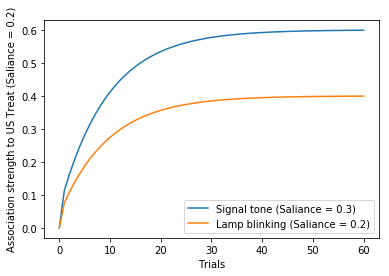

In [14]:
model = RescorlaWagnerModel()

model.add_conditioned_stimulus(saliance=0.3, name='Signal tone')
model.add_conditioned_stimulus(saliance=0.2, name='Lamp blinking')

model.add_unconditioned_stimulus(saliance=0.2, name='Treat')

model.acquisition_phase(
    conditioned_stimuli_names=['Signal tone', 'Lamp blinking'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=60
)
model.plot()

## Blocking

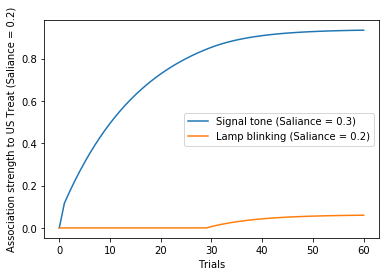

In [4]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Signal tone')
model.add_conditioned_stimulus(saliance=0.2, name='Lamp blinking')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
model.acquisition_phase(
    conditioned_stimuli_names=['Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=30
)
model.acquisition_phase(
    conditioned_stimuli_names=['Lamp blinking', 'Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=30
)
model.plot()

## Extinction 

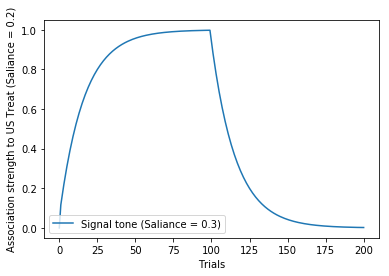

In [5]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Signal tone')
model.add_conditioned_stimulus(saliance=0.2, name='Lamp blinking')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
model.acquisition_phase(
    conditioned_stimuli_names=['Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=100
)
model.extinction_phase(
    conditioned_stimuli_names=['Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=100
)
model.plot()

## Intermittet reinforcement

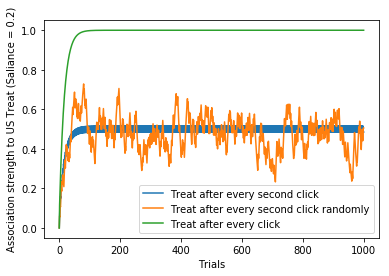

In [16]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Clicker tone')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
for i in range(500):
    model.acquisition_phase(
        conditioned_stimuli_names=['Clicker tone'],
        unconditioned_stimuli_names=['Treat']
    )
    model.extinction_phase(
        conditioned_stimuli_names=['Clicker tone'],
        unconditioned_stimuli_names=['Treat']
    )
model.plot(label='Treat after every second click')

model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Clicker tone')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
for i in range(1000):
    if np.random.uniform() > 0.5:
        model.acquisition_phase(
            conditioned_stimuli_names=['Clicker tone'],
            unconditioned_stimuli_names=['Treat']
        )
    else:
        model.extinction_phase(
            conditioned_stimuli_names=['Clicker tone'],
            unconditioned_stimuli_names=['Treat']
        )
model.plot(label='Treat after every second click randomly')

model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Clicker tone')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
for i in range(1000):
    model.acquisition_phase(
        conditioned_stimuli_names=['Clicker tone'],
        unconditioned_stimuli_names=['Treat']
    )
model.plot(label='Treat after every click')


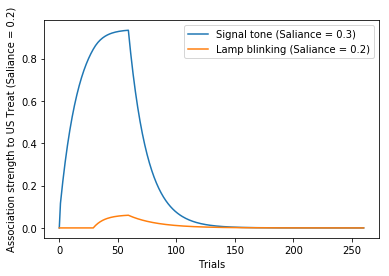

In [8]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.3, name='Signal tone')
model.add_conditioned_stimulus(saliance=0.2, name='Lamp blinking')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
model.acquisition_phase(
    conditioned_stimuli_names=['Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=30
)
model.acquisition_phase(
    conditioned_stimuli_names=['Lamp blinking', 'Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=30
)
model.extinction_phase(
    conditioned_stimuli_names=['Lamp blinking', 'Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=200
)
model.plot()

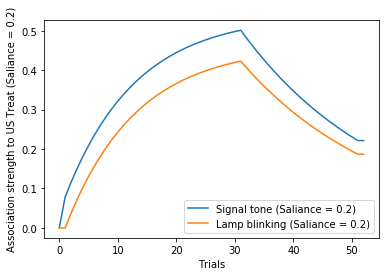

In [9]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.2, name='Signal tone')
model.add_conditioned_stimulus(saliance=0.2, name='Lamp blinking')
model.add_unconditioned_stimulus(saliance=0.2, name='Treat')
model.acquisition_phase(
    conditioned_stimuli_names=['Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=2
)
model.acquisition_phase(
    conditioned_stimuli_names=['Lamp blinking', 'Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=30
)
model.extinction_phase(
    conditioned_stimuli_names=['Lamp blinking', 'Signal tone'],
    unconditioned_stimuli_names=['Treat'],
    n_trials=20
)
model.plot()

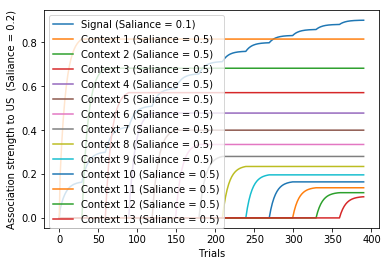

In [22]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.1, name='Signal')
model.add_conditioned_stimulus(saliance=0.5, name='Context 1')
model.add_conditioned_stimulus(saliance=0.5, name='Context 2')
model.add_conditioned_stimulus(saliance=0.5, name='Context 3')
model.add_conditioned_stimulus(saliance=0.5, name='Context 4')
model.add_conditioned_stimulus(saliance=0.5, name='Context 5')
model.add_conditioned_stimulus(saliance=0.5, name='Context 6')
model.add_conditioned_stimulus(saliance=0.5, name='Context 7')
model.add_conditioned_stimulus(saliance=0.5, name='Context 8')
model.add_conditioned_stimulus(saliance=0.5, name='Context 9')
model.add_conditioned_stimulus(saliance=0.5, name='Context 10')
model.add_conditioned_stimulus(saliance=0.5, name='Context 11')
model.add_conditioned_stimulus(saliance=0.5, name='Context 12')
model.add_conditioned_stimulus(saliance=0.5, name='Context 13')
model.add_unconditioned_stimulus(0.2, name='')

n_trials = 30
model.acquisition_phase(
    conditioned_stimuli_names=['Context 1', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 2', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 3', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 4', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 5', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 6', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 7', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 8', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 9', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 10', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 11', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 12', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 13', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.plot(loc_legend='upper left')

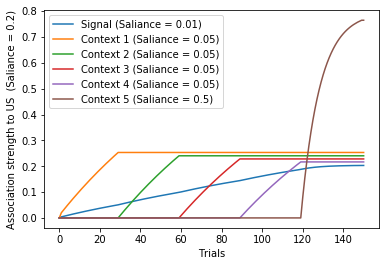

In [20]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.01, name='Signal')
model.add_conditioned_stimulus(saliance=0.05, name='Context 1')
model.add_conditioned_stimulus(saliance=0.05, name='Context 2')
model.add_conditioned_stimulus(saliance=0.05, name='Context 3')
model.add_conditioned_stimulus(saliance=0.05, name='Context 4')
model.add_conditioned_stimulus(saliance=0.5, name='Context 5')

model.add_unconditioned_stimulus(saliance=0.2, name='')

n_trials = 30
model.acquisition_phase(
    conditioned_stimuli_names=['Context 1', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 2', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 3', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 4', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)
model.acquisition_phase(
    conditioned_stimuli_names=['Context 5', 'Signal'],
    unconditioned_stimuli_names=[''],
    n_trials=n_trials
)

model.plot(loc_legend='upper left')

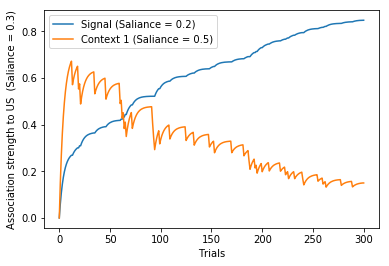

In [21]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.2, name='Signal')
model.add_conditioned_stimulus(saliance=0.5, name='Context 1')
model.add_conditioned_stimulus(saliance=0.5, name='Context 2')
model.add_conditioned_stimulus(saliance=0.5, name='Context 3')
model.add_conditioned_stimulus(saliance=0.5, name='Context 4')
model.add_conditioned_stimulus(saliance=0.5, name='Context 5')

model.add_unconditioned_stimulus(saliance=0.3, name='')

n_trials = 30
signal_rate = 0.1

for i in range(int(n_trials/signal_rate)):
    if np.random.uniform() > signal_rate:
        model.acquisition_phase(
            conditioned_stimuli_names=['Context 1', 'Signal'],
            unconditioned_stimuli_names=['']
        )
    else:
        model.extinction_phase(
            conditioned_stimuli_names=['Context 1'],
            unconditioned_stimuli_names=['']
        )
        
model.plot(loc_legend='upper left')

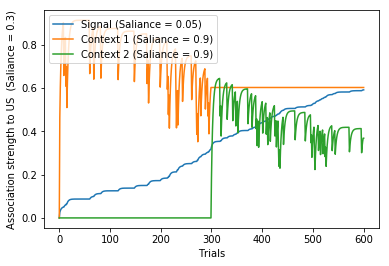

In [13]:
model = RescorlaWagnerModel()
model.add_conditioned_stimulus(saliance=0.05, name='Signal')
model.add_conditioned_stimulus(saliance=0.9, name='Context 1')
model.add_conditioned_stimulus(saliance=0.9, name='Context 2')

model.add_unconditioned_stimulus(saliance=0.3, name='')

n_trials = 30
signal_rate = 0.1

for i in range(int(n_trials/signal_rate)):
    if np.random.uniform() > signal_rate:
        model.acquisition_phase(
            conditioned_stimuli_names=['Context 1', 'Signal'],
            unconditioned_stimuli_names=['']
        )
    else:
        model.extinction_phase(
            conditioned_stimuli_names=['Context 1'],
            unconditioned_stimuli_names=['']
        )
        
for i in range(int(n_trials/signal_rate)):
    if np.random.uniform() > signal_rate:
        model.acquisition_phase(
            conditioned_stimuli_names=['Context 2', 'Signal'],
            unconditioned_stimuli_names=['']
        )
    else:
        model.extinction_phase(
            conditioned_stimuli_names=['Context 2'],
            unconditioned_stimuli_names=['']
        )
        
model.plot(loc_legend='upper left')

In [23]:
# Fehlclicks?